In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
df_e = pd.read_csv('final_encoded.csv')

df_e = df_e.drop(columns=[col for col in df_e.columns if col.startswith('district_')])

In [5]:
df_e

,price,metro_time,info_total_area,floor_ratio,last_floor,area_Внуково поселок,area_Внуковское поселение,area_Десеновское поселение,area_Завода Мосрентген поселок,area_Ивановское деревня,...,rent_living_conditions_можно с детьми,rent_living_conditions_можно с детьми и животными,rent_living_conditions_можно с животными,"rent_living_conditions_ни с детьми, ни с животными",year_built_interval_1890-1917,year_built_interval_1917-1945,year_built_interval_1945-1970,year_built_interval_1970-1990,year_built_interval_1991-2025,year_built_interval_не попал
0,470000,7.0,73.0,0.683333,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,270000,13.0,68.0,0.522727,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,30000,9.0,40.0,0.333333,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,75000,13.0,60.0,0.375000,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,29000,7.0,12.0,0.611111,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,65000,5.0,27.0,0.133333,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1386,65000,24.0,35.7,0.636364,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1387,65000,6.0,40.0,0.636364,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1388,64000,7.0,22.0,0.333333,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [6]:
X = sm.add_constant(df_e.drop(columns='price'))
y = df_e['price']

model = sm.OLS(y, X).fit()

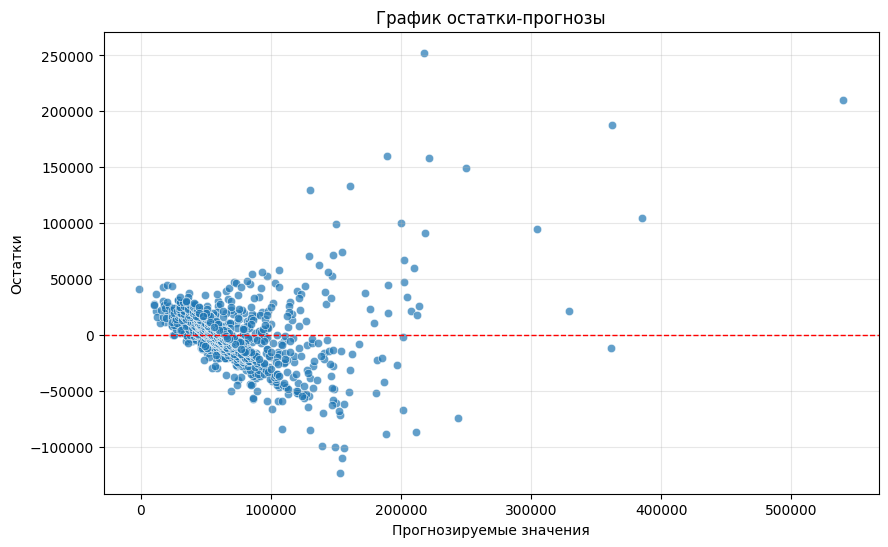

In [9]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('График остатки-прогнозы')
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')
plt.grid(alpha=0.3)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


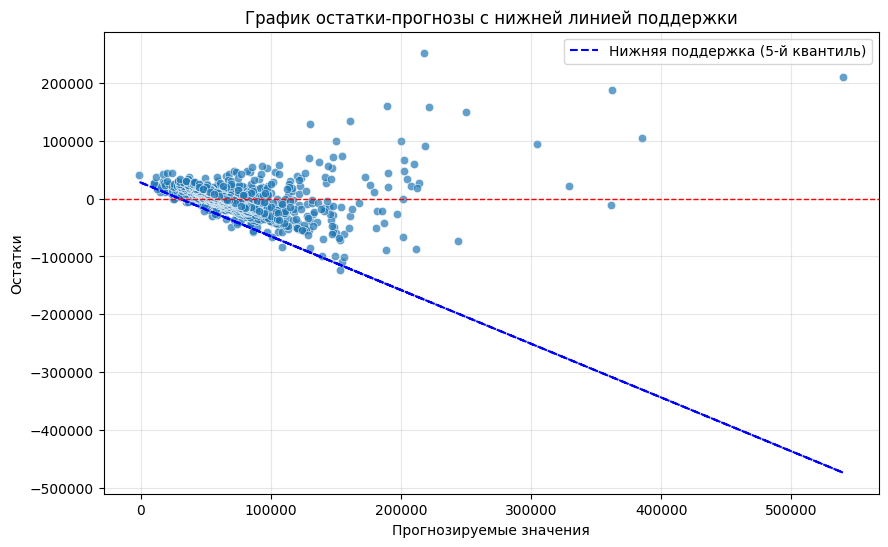

In [19]:
import statsmodels.formula.api as smf
import pandas as pd

# Предположим, что fitted_values и residuals — это np.arrays
df_plot = pd.DataFrame({'fitted': fitted_values, 'resid': residuals})

# 1-й перцентиль
model_support = smf.quantreg('resid ~ fitted', df_plot).fit(q=0.01)
support_line = model_support.predict(df_plot['fitted'])

# Построение графика
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fitted', y='resid', data=df_plot, alpha=0.7)

plt.plot(df_plot['fitted'], support_line, color='blue', linestyle='--', label='Нижняя поддержка (5-й квантиль)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.title('График остатки-прогнозы с нижней линией поддержки')
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


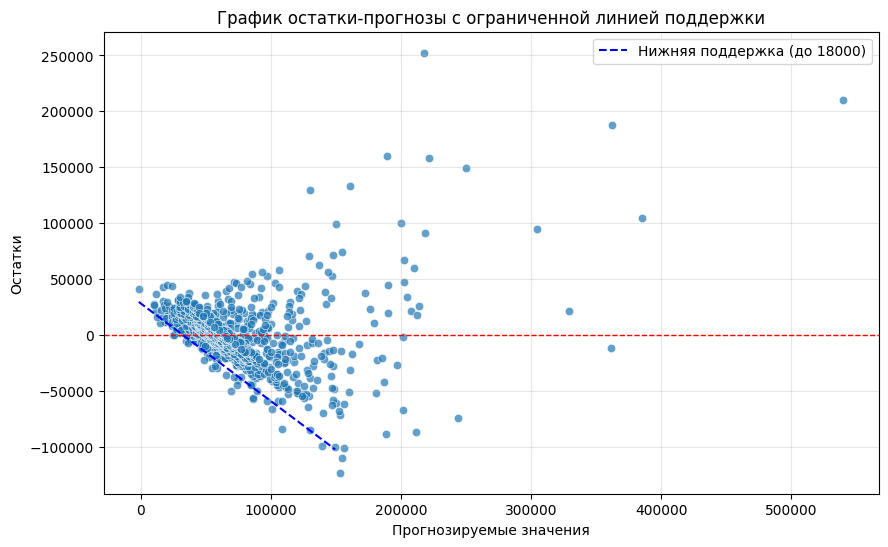

In [27]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Исходный датафрейм
df_plot = pd.DataFrame({'fitted': fitted_values, 'resid': residuals})

# Квантильная регрессия по всем данным
model_support = smf.quantreg('resid ~ fitted', df_plot).fit(q=0.02)

# Сортируем значения по возрастанию для гладкой линии
fitted_sorted = np.sort(df_plot['fitted'])

# Ограничиваем до 18000
fitted_limited = fitted_sorted[fitted_sorted <= 150000]

# Предсказания по support-линии
support_line = model_support.predict(pd.DataFrame({'fitted': fitted_limited}))

# График
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fitted', y='resid', data=df_plot, alpha=0.7)

# Линия поддержки только до 18000
plt.plot(fitted_limited, support_line, color='blue', linestyle='--', label='Нижняя поддержка (до 18000)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.title('График остатки-прогнозы с ограниченной линией поддержки')
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [7]:
from statsmodels.stats.diagnostic import het_white

model = sm.OLS(y, X).fit()

# Тест Уайта
test_result_white = het_white(model.resid, model.model.exog)

print('Тест Уайта на гетероскедастичность: \n')
print('p-value:', test_result_white[1], '\n')
print('Критический уровень значимости: 0.05 \n')
print('Результат теста:', 'гетероскедастичность обнаружена' if test_result_white[1] < 0.05 else 'гетероскедастичности не обнаружено')

Тест Уайта на гетероскедастичность: 

p-value: 0.004488604093684402 

Критический уровень значимости: 0.05 

Результат теста: гетероскедастичность обнаружена


In [8]:
from statsmodels.stats.diagnostic import het_breuschpagan

model = sm.OLS(y, X).fit()

# Тест Бройша-Пагана
test_result_breuschpagan = het_breuschpagan(model.resid, model.model.exog)

print('Тест Бройша-Пагана на гетероскедастичность: \n')
print('p-value:', test_result_breuschpagan[1], '\n')
print('Критический уровень значимости: 0.05 \n')
print('Результат теста:', 'гетероскедастичность обнаружена' if test_result_breuschpagan[1] < 0.05 else 'гетероскедастичности не обнаружено')

Тест Бройша-Пагана на гетероскедастичность: 

p-value: 1.935384062647882e-36 

Критический уровень значимости: 0.05 

Результат теста: гетероскедастичность обнаружена
